##**IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

In [4]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [5]:
df.tail()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


In [6]:
df.shape

(15433, 11)

In [7]:
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [8]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [10]:
df['Year'].unique()
# To see the year

array([1976.,   nan, 1980., 1984., 1988., 1992., 1996., 2000., 2004.,
       2008.])

In [11]:
# To extract the destination of the competition
df['City'].unique()

array(['Montreal', nan, 'Moscow', 'Los Angeles', 'Seoul', 'Barcelona',
       'Atlanta', 'Sydney', 'Athens', 'Beijing'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [14]:
# This will represent the rows with NaN values
df[df.isnull().any(axis=1)]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Displaying the sum of null values for each column
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [16]:
# Dropping the 117 null values
# inplace=True will permanantly drop the NaN values
df.dropna(inplace=True)

In [17]:
df.shape

(15316, 11)

In [19]:
games_per_year = df.Year.value_counts()
games_per_year

2008.0    2042
2000.0    2015
2004.0    1998
1996.0    1859
1992.0    1705
1988.0    1546
1984.0    1459
1980.0    1387
1976.0    1305
Name: Year, dtype: int64

##**SORTING THE COUNTRY BY NUMBER OF MEDALS**

In [52]:
country_gold_medals = df[df['Medal'] == 'Gold'].groupby('Country')['Medal'].count().sort_values(ascending=False)
country_gold_medals

Country
United States    928
Soviet Union     439
East Germany     286
Germany          237
China            234
                ... 
Panama             1
Burundi            1
Suriname           1
Colombia           1
Tunisia            1
Name: Medal, Length: 87, dtype: int64

In [27]:
top_ten_countries = country_gold_medals.head(10)
top_ten_countries

Country
United States    928
Soviet Union     439
East Germany     286
Germany          237
China            234
Australia        216
Russia           192
France           154
Cuba             152
Italy            145
Name: Medal, dtype: int64

##**BAR GRAPH FOR THE ABOVE CONDITION**

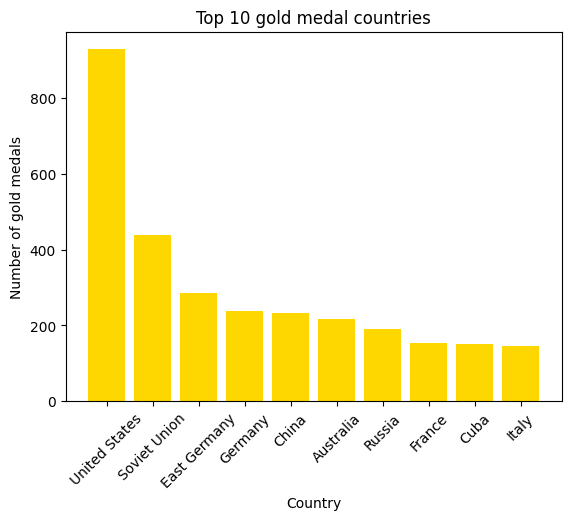

In [53]:
plt.bar(top_ten_countries.index, top_ten_countries.values, color='gold')
plt.xlabel('Country')
plt.ylabel('Number of gold medals')
plt.title('Top 10 gold medal countries')
plt.xticks(rotation=45)
plt.show()

##**GOLD MEDALS GROUPING ACCORDING TO GENDER**

In [54]:
gender_wise_gold_medals = df.groupby('Gender')['Medal'].count()
gender_wise_gold_medals

Gender
Men      9388
Women    5928
Name: Medal, dtype: int64

In [30]:
# Grouping the sport and gold medals
sports_gold_medals = df.groupby('Sport')['Medal'].count().sort_values(ascending=False)
sports_gold_medals

Sport
Aquatics             2210
Athletics            1523
Rowing               1377
Hockey                817
Gymnastics            783
Handball              780
Volleyball            695
Canoe / Kayak         672
Football              669
Basketball            646
Fencing               606
Wrestling             533
Cycling               483
Equestrian            423
Sailing               417
Boxing                416
Judo                  396
Shooting              345
Baseball              335
Weightlifting         311
Softball              180
Archery               162
Badminton             120
Table Tennis          120
Tennis                118
Modern Pentathlon      81
Taekwondo              80
Triathlon              18
Name: Medal, dtype: int64

In [32]:
top_five_sports = sports_gold_medals.head(5)
top_five_sports

Sport
Aquatics      2210
Athletics     1523
Rowing        1377
Hockey         817
Gymnastics     783
Name: Medal, dtype: int64

##**BAR GRAPH FOR THE ABOVE CONDITION**

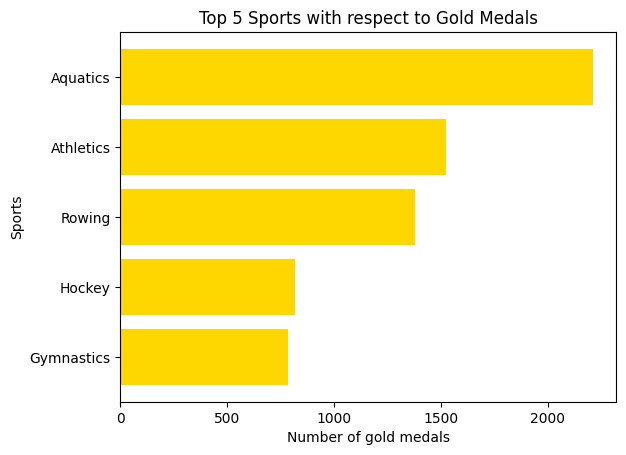

In [35]:
plt.barh(top_five_sports.index, top_five_sports.values, color='gold')
plt.xlabel('Number of gold medals')
plt.ylabel('Sports')
plt.title('Top 5 Sports with respect to Gold Medals')
plt.gca().invert_yaxis()
plt.show()

##**ATHLETES, SPORTS AND EVENT ACCORDING TO THE YEAR**

In [56]:
athletes_sport_event_year = df.groupby(['Athlete', 'Sport', 'Event',])['Year'].count().reset_index()
athletes_sport_event_year

,Athlete,Sport,Event,Year
0,"AAMODT, Ragnhild",Handball,handball,1
1,"AARDENBURG, Willemien",Hockey,hockey,1
2,"AARDEWIJN, Pepijn",Rowing,lightweight double sculls (2x),1
3,"AARONES, Ann Kristin",Football,football,1
4,"ABAJO, Jose Luis",Fencing,épée individual,1
...,...,...,...,...
12950,"ZYCH, Boguslaw",Fencing,foil team,1
12951,"ZYKINA, Olesya",Athletics,4x400m relay,2
12952,"ZÜHLKE, Steffen",Rowing,quadruple sculls without coxswain (4x),1
12953,"ZÜLOW, Andreas",Boxing,57 - 60kg (lightweight),1


In [59]:
# Filtering the Athletes who won more than one time for removing the duplicacy the Names by using the Year attribute
athletes_sport_event_year_remove_duplicate = athletes_sport_event_year[athletes_sport_event_year['Year'] > 1]
athletes_sport_event_year_remove_duplicate

,Athlete,Sport,Event,Year
17,"ABBAGNALE, Agostino",Rowing,quadruple sculls without coxswain (4x),2
18,"ABBAGNALE, Carmine",Rowing,pair-oared shell with coxswain (2+),3
19,"ABBAGNALE, Giuseppe",Rowing,pair-oared shell with coxswain (2+),3
39,"ABRAHAM, Attila",Canoe / Kayak,K-4 1000m (kayak four),2
45,"ABSALON, Julien",Cycling,cross-country,2
...,...,...,...,...
12917,"ZOU, Shiming",Boxing,48kg (light flywieght),2
12931,"ZUKAUSKAS, Eurelijus",Basketball,basketball,2
12938,"ZVEREVA, Ellina",Athletics,discus throw,2
12945,"ZWERVER, Ronald",Volleyball,volleyball,2


In [58]:
print('Athletes who have dominated in the sports and their details: ')
print()
print(athletes_sport_event_year_remove_duplicate[['Athlete', 'Sport', 'Event', 'Year']])

Athletes who have dominated in the sports and their details: 

                    Athlete          Sport  \
17      ABBAGNALE, Agostino         Rowing   
18       ABBAGNALE, Carmine         Rowing   
19      ABBAGNALE, Giuseppe         Rowing   
39          ABRAHAM, Attila  Canoe / Kayak   
45          ABSALON, Julien        Cycling   
...                     ...            ...   
12917          ZOU, Shiming         Boxing   
12931  ZUKAUSKAS, Eurelijus     Basketball   
12938       ZVEREVA, Ellina      Athletics   
12945       ZWERVER, Ronald     Volleyball   
12951        ZYKINA, Olesya      Athletics   

                                        Event  Year  
17     quadruple sculls without coxswain (4x)     2  
18        pair-oared shell with coxswain (2+)     3  
19        pair-oared shell with coxswain (2+)     3  
39                     K-4 1000m (kayak four)     2  
45                              cross-country     2  
...                                       ...   ...  
12917 

##**DOMINATING ATHLETES IN THE OLYMPICS**

In [49]:
# Now calculating the medals of the athletes
athletes_gold_medals = df['Athlete'].value_counts()
athletes_gold_medals

PHELPS, Michael                  16
TORRES, Dara                     12
THOMPSON, Jenny                  12
FISCHER, Birgit                  12
ANDRIANOV, Nikolay               12
                                 ..
KIRKWOOD, James William           1
LEJEUNE, Elisabeth Anne Marie     1
WOLFF, Ingrid Imelda              1
MEILING, Marc                     1
LOPEZ, Mijain                     1
Name: Athlete, Length: 11337, dtype: int64

In [50]:
top_ten_athletes_gold_medals = athletes_gold_medals.head(10)
top_ten_athletes_gold_medals

PHELPS, Michael           16
TORRES, Dara              12
THOMPSON, Jenny           12
FISCHER, Birgit           12
ANDRIANOV, Nikolay        12
NEMOV, Alexei             12
COUGHLIN, Natalie         11
BIONDI, Matthew           11
VAN ALMSICK, Franziska    10
LEWIS, Carl               10
Name: Athlete, dtype: int64

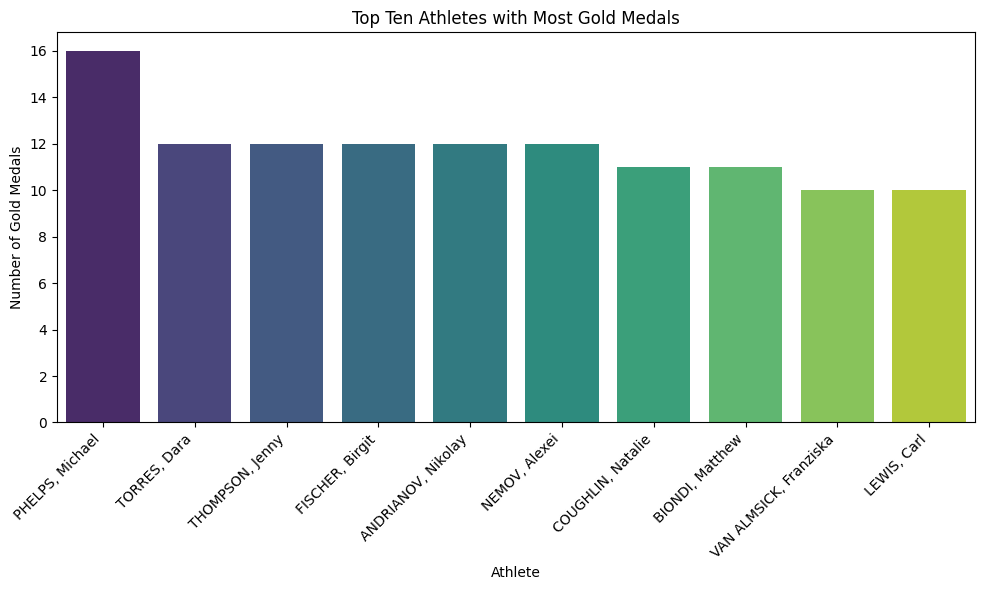

In [51]:
plt.figure(figsize = (10,6))
sns.barplot(x=top_ten_athletes_gold_medals.index, y=top_ten_athletes_gold_medals.values, palette='viridis')
plt.title('Top Ten Athletes with Most Gold Medals')
plt.xlabel('Athlete')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()